**Aprèn a realitzar mostreig de les dades amb Python.**
# Nivell 1
# Exercici 1
**Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.**

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount ('/content/drive')
%cd'/content/drive/MyDrive/Sprint 5 (Sampling)'

Mounted at /content/drive
/content/drive/MyDrive/Sprint 5 (Sampling)


Per a la realització d'aquest Sprint, s'ha agafat un Dataset dels atletes olympics desde l'any 1896 (Atenes) fins al 2016 (Rio)

In [3]:
df = pd.read_csv('athlete_events.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


En aquest DataFrame podem veure que, com que un mateix atleta es pot presentar a més d'una modalitat, aquest pot aparèixer més d'una vegada, i com que en aquest samplejat voldrem mirar quines son les característiques físiques mitjanes dels atletes, eliminarem tots els atletes repetits per tal d'evitar informació duplicada.
Evidentment també descartarem la variable 'Event' ja que deixaría de tenir sentit si ens quedem només amb una modalitat de cada atleta.
També descartarem les variables 'NOC' i 'Games' perquè repeteixen informació d'altres variables i 'Medal' perque no ens dona informació poc útil.

In [4]:
df = df.drop_duplicates(subset='ID', keep='first')

In [5]:
df = df.drop(columns=['Event','NOC', 'Games', 'Medal'])

In [6]:
df

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920,Summer,Antwerpen,Football
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating
...,...,...,...,...,...,...,...,...,...,...,...
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,2000,Summer,Sydney,Rowing
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,2016,Summer,Rio de Janeiro,Basketball
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976,Winter,Innsbruck,Luge
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014,Winter,Sochi,Ski Jumping


Veiem que hi ha una considerable quantitat d'atletes dels quals no sabem l'edat, l'altura ni el pes, així que per desgràcia ens hem de desfer d'aquests atletes ja que precisament són les variables que ens interessen.

In [7]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        6368
Height    33916
Weight    34885
Team          0
Year          0
Season        0
City          0
Sport         0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.describe()

,ID,Age,Height,Weight,Year
count,99088.000000,99088.000000,99088.000000,99088.000000,99088.000000
mean,68318.212347,23.927963,176.366654,71.959879,1989.134890
std,39103.211945,4.717857,10.386070,14.553032,20.162178
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,34744.750000,21.000000,170.000000,62.000000,1976.000000
50%,68494.500000,23.000000,176.000000,71.000000,1992.000000
75%,102087.500000,26.000000,183.000000,80.000000,2004.000000
max,135571.000000,68.000000,226.000000,214.000000,2016.000000


Mostra aleatòria simple

In [10]:
#Agafem 1000 mostres aleatòries
df.sample(1000)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
162056,81358,Iszlam Monier Suliman,M,25.0,182.0,90.0,Sudan,2016,Summer,Rio de Janeiro,Judo
208472,104643,Jana Salat,F,21.0,174.0,67.0,Canada,2000,Summer,Sydney,Water Polo
56741,29069,Jeremy Dodson,M,28.0,180.0,72.0,Samoa,2016,Summer,Rio de Janeiro,Athletics
113722,57605,Truls Ove Karlsen,M,26.0,172.0,73.0,Norway,2002,Winter,Salt Lake City,Alpine Skiing
65833,33690,Aigars Fadejevs,M,20.0,175.0,69.0,Latvia,1996,Summer,Atlanta,Athletics
...,...,...,...,...,...,...,...,...,...,...,...
42824,22098,Wendy Linnelle Cluff (-Perez),F,17.0,163.0,55.0,United States,1968,Summer,Mexico City,Gymnastics
217097,109035,Tanya Karen Seymour,F,32.0,165.0,57.0,South Africa,2016,Summer,Rio de Janeiro,Equestrianism
110030,55632,Carolyn Jones (-Young),F,22.0,172.0,59.0,United States,1992,Summer,Barcelona,Basketball
15859,8551,Anders Ingemar Btemyr,M,26.0,176.0,71.0,Sweden,2000,Summer,Sydney,Rowing


In [11]:
#Agafem el 25% de les mostres totals (també aleatòries)
df.sample(frac =.25)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
234288,117500,Istvn Szepesi,M,21.0,188.0,98.0,Hungary,1980,Summer,Moskva,Judo
79422,40339,Bertrand Fabien Gille,M,22.0,187.0,98.0,France,2000,Summer,Sydney,Handball
25469,13304,"Johannes Cornelius ""Rob"" Bontje",M,23.0,206.0,85.0,Netherlands,2004,Summer,Athina,Volleyball
231256,116031,Erwin Sttz,M,28.0,182.0,70.0,Switzerland,1964,Summer,Tokyo,Athletics
218591,109790,Sakiko Shimizu,F,24.0,156.0,50.0,Japan,2016,Summer,Rio de Janeiro,Swimming
...,...,...,...,...,...,...,...,...,...,...,...
194095,97435,Joona Tapio Puhakka,M,18.0,178.0,79.0,Finland,2000,Summer,Sydney,Diving
215657,108270,Cdric Thierry Sguin,M,27.0,174.0,75.0,France,2000,Summer,Sydney,Fencing
116193,58836,Ann Maree Kerr,F,16.0,157.0,43.0,Australia,1984,Summer,Los Angeles,Rhythmic Gymnastics
237988,119341,Amela Terzi,F,23.0,169.0,54.0,Serbia,2016,Summer,Rio de Janeiro,Athletics


Mostra sistemàtica.
Com que no sabem si la taula esta construida seguint un ordre, agafarem les mostres el mes separat possible per intentar tenir unes dades el menys sesgat possible. Com que volem 1000 mostres i hi ha 99k, agafarem una cada 99 mostres.

In [12]:
df.iloc[0:-1:99]

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball
265,137,Giordano Giulio Abbondati,M,15.0,175.0,64.0,Italy,1964,Winter,Innsbruck,Figure Skating
516,289,Abdul Haji Abdul Latheef,M,17.0,168.0,54.0,Maldives,1988,Summer,Seoul,Athletics
760,434,David Abibssira,M,21.0,179.0,63.0,France,1984,Summer,Los Angeles,Shooting
997,562,Pawe Abratkiewicz,M,21.0,183.0,84.0,Poland,1992,Winter,Albertville,Speed Skating
...,...,...,...,...,...,...,...,...,...,...,...
269641,134928,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,16.0,173.0,61.0,United States,1992,Winter,Albertville,Short Track Speed Skating
269963,135063,Tamer Hamed Ali Zinhom Muhammad,M,22.0,190.0,80.0,Egypt,1996,Summer,Atlanta,Swimming
270255,135196,Armin Zggeler,M,20.0,181.0,88.0,Italy,1994,Winter,Lillehammer,Luge
270585,135330,Valery Viktorovich Zubanov,M,21.0,184.0,82.0,Soviet Union,1972,Summer,Munich,Sailing


# Nivell 2
## Exercici 2
**Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).**

Mostra estratificada. Farem dos subgrups dividits per sexes i agafarem 500 de cada un per tenir un total de 1000 mostres.

In [13]:
dfM = df.loc[df['Sex'] == 'M'].sample(500)
dfM

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
184767,92859,Federico Pellegrino,M,23.0,173.0,67.0,Italy,2014,Winter,Sochi,Cross Country Skiing
182532,91741,Andrs Parczai,M,24.0,176.0,72.0,Hungary,1980,Summer,Moskva,Athletics
266358,133256,Adnan Youssef,M,16.0,185.0,75.0,Pakistan,1984,Summer,Los Angeles,Sailing
214192,107547,"Wilhelm Otto ""Willy"" Schrder",M,24.0,184.0,87.0,Germany,1936,Summer,Berlin,Athletics
131948,66410,Ville Lng,M,23.0,177.0,75.0,Finland,2008,Summer,Beijing,Badminton
...,...,...,...,...,...,...,...,...,...,...,...
98256,49724,Hong Kuk-Hyon,M,26.0,179.0,73.0,North Korea,2016,Summer,Rio de Janeiro,Judo
58088,29728,Panagiotis Dourakos,M,19.0,190.0,80.0,Greece,1972,Summer,Munich,Fencing
32251,16584,Damir Buri,M,23.0,205.0,115.0,Croatia,2004,Summer,Athina,Water Polo
173166,87041,Dmitry Yuryevich Nosov,M,24.0,176.0,175.0,Russia,2004,Summer,Athina,Judo


In [14]:
dfF = df.loc[df['Sex'] == 'F'].sample(500)
dfF

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
147857,74201,Dominique Maltais,F,25.0,178.0,71.0,Canada,2006,Winter,Torino,Snowboarding
190257,95559,Elizabeth Francesca Poblete Fernndez,F,20.0,160.0,75.0,Chile,2008,Summer,Beijing,Weightlifting
165617,83180,Shauna Mullin,F,27.0,178.0,74.0,Great Britain,2012,Summer,London,Beach Volleyball
81105,41184,Myrtille Gollin,F,21.0,168.0,57.0,France,2006,Winter,Torino,Short Track Speed Skating
51167,26297,Sandra Lynn De La Riva (-Baza),F,22.0,170.0,65.0,United States,1984,Summer,Los Angeles,Handball
...,...,...,...,...,...,...,...,...,...,...,...
72954,37080,"Susan ""Sue"" French-Lee",F,24.0,157.0,48.0,Canada,1984,Summer,Los Angeles,Athletics
18907,10021,Maja Benedii,F,24.0,172.0,60.0,Slovenia,2006,Winter,Torino,Cross Country Skiing
106931,54058,Monique Alicia Javer,F,25.0,177.0,64.0,Great Britain,1992,Summer,Barcelona,Tennis
36214,18618,Bianca Carstensen (-Bech),F,25.0,179.0,72.0,Denmark,2000,Summer,Sydney,Rowing


In [15]:
pd.merge(dfM, dfF, how = 'outer')

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
0,92859,Federico Pellegrino,M,23.0,173.0,67.0,Italy,2014,Winter,Sochi,Cross Country Skiing
1,91741,Andrs Parczai,M,24.0,176.0,72.0,Hungary,1980,Summer,Moskva,Athletics
2,133256,Adnan Youssef,M,16.0,185.0,75.0,Pakistan,1984,Summer,Los Angeles,Sailing
3,107547,"Wilhelm Otto ""Willy"" Schrder",M,24.0,184.0,87.0,Germany,1936,Summer,Berlin,Athletics
4,66410,Ville Lng,M,23.0,177.0,75.0,Finland,2008,Summer,Beijing,Badminton
...,...,...,...,...,...,...,...,...,...,...,...
995,37080,"Susan ""Sue"" French-Lee",F,24.0,157.0,48.0,Canada,1984,Summer,Los Angeles,Athletics
996,10021,Maja Benedii,F,24.0,172.0,60.0,Slovenia,2006,Winter,Torino,Cross Country Skiing
997,54058,Monique Alicia Javer,F,25.0,177.0,64.0,Great Britain,1992,Summer,Barcelona,Tennis
998,18618,Bianca Carstensen (-Bech),F,25.0,179.0,72.0,Denmark,2000,Summer,Sydney,Rowing


SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

Aprofitarem que hi ha menys de la meitat de dades de noies i aplicarem el mètode de oversampling amb SMOTE perque hi hagui més.

In [17]:
df.Sex.value_counts()

M    69279
F    29809
Name: Sex, dtype: int64

En aquesta gràfica veiem la distribució de tots els atletes classificats per altura, pes i sexe. Després d'haver resamplejat el dataset tornarem a grafirar-lo per veure com ha canviat.

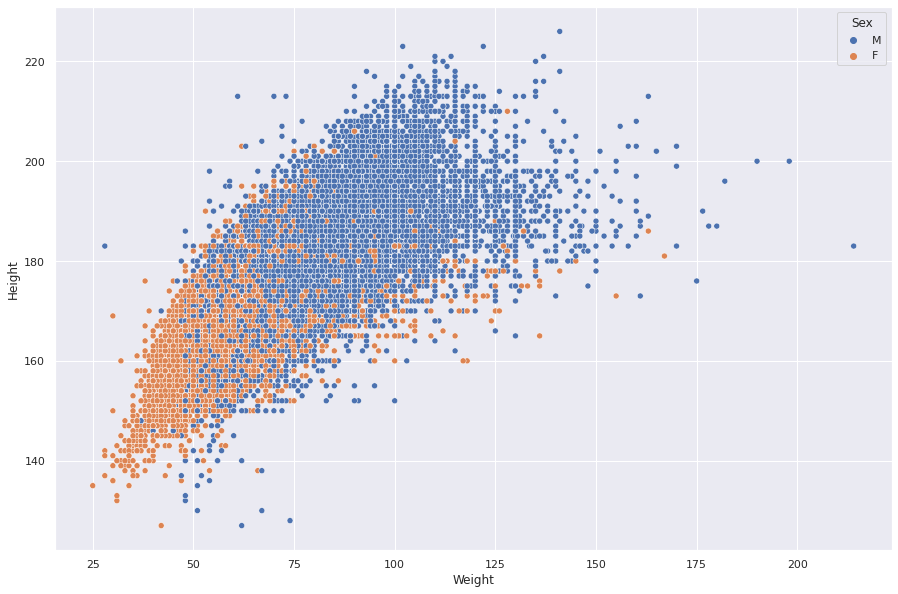

In [18]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot(data = df, x = 'Weight', y='Height', hue='Sex')

Li diem la columna de la qual crearà noves mostres segons la falta de mostres que hi hagi d'una classe (Sex), i les columnes les quals volem que ens ompli d'informació (Weight, Height i Age).

In [19]:
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(df[['Weight', 'Height', 'Age']], df[['Sex']])

La cel·la anterior ens generara dos dataframes, un per a la variable principal per a la que es basarà el resampling (Y_sm) i un altre per les altres variables que volem que ens generi informació (X_sm). Juntem els dos dataframes per poder graficarla.

In [20]:
dfSmote = X_sm.join(Y_sm)

Veim que efectivement s'han generat més mostres per a les noies 

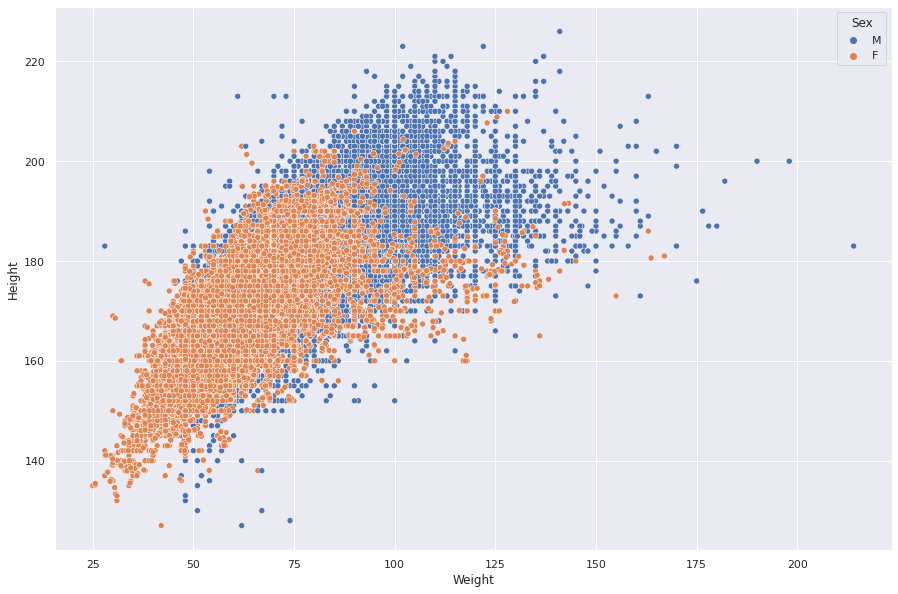

In [21]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot(data = dfSmote, x = 'Weight', y='Height', hue='Sex')

# Nivell 3
## Exercici 3
**Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling**

In [22]:
import random

In [23]:
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

stream = generator(df.shape[0])

k=1000
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
             reservoir[random.choice(range(0,k))] = element
dfR = df.iloc[reservoir]

In [24]:
dfR

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
127751,64399,Richard Adam Kruse,M,21.0,190.0,84.0,Great Britain,2004,Summer,Athina,Fencing
222689,111864,"Joshua ""Josh"" Slack",M,23.0,191.0,88.0,Australia-2,2000,Summer,Sydney,Beach Volleyball
148645,74554,Yolita Manolova,F,18.0,175.0,57.0,Bulgaria,2008,Summer,Beijing,Rhythmic Gymnastics
102325,51763,Ken Ikeda,M,22.0,170.0,60.0,Canada,2004,Summer,Athina,Gymnastics
119977,60742,Mariya Kirkova,F,20.0,165.0,59.0,Bulgaria,2006,Winter,Torino,Alpine Skiing
...,...,...,...,...,...,...,...,...,...,...,...
161490,81072,Petr Mokr,M,24.0,184.0,75.0,Czechoslovakia,1972,Summer,Munich,Canoeing
177631,89278,Simone Opitz (Butters-),F,24.0,169.0,52.0,East Germany,1988,Winter,Calgary,Cross Country Skiing
113293,57385,Reit Karabacak,M,30.0,170.0,82.0,Turkey,1984,Summer,Los Angeles,Wrestling
268667,134412,Birzhan Zhakypovich Zhakypov,M,24.0,167.0,48.0,Kazakhstan,2008,Summer,Beijing,Boxing
